<a id='Описание задачи'></a>
## 1.Описание задачи

Нужно помочь маркетологам оптимизировать маркетинговые затраты.

<a id='Ход работы'></a>
### 1.1 Ход работы

Для начала мы ознакомимся со всеми данными, после чего  где нужно изменим типы данных  в таблицах. Далее мы приступик к каждой таблице по отдельности и посчитаем требуемые значения, для наглядности значения укажем на графиках.

<a id='Навигация'></a>
### 1.2 Навигация 

<a href='#Описание задачи'> 1. Описание задачи </a>

<a href='#Ход работы'> 1.1 Ход работы </a>

<a href='#Навигация'> 1.2 Навигация</a>

<a href='#Описание данных'> 1.3 Описание данных</a>

<a href='#Таблица visits с информацией о посещениях сайта'> 1.3.1 Таблица visits с информацией о посещениях сайта</a>

<a href='#Таблица orders с информацией о заказах'> 1.3.2 Таблица orders с информацией о заказах</a>

<a href='#Таблица coasts с информацией о затратах на маркетинг'> 1.3.3 Таблица coasts с информацией о затратах на маркетинг</a>

<a href='#Знакомство с данными'> 1.4 Знакомство с данными </a>

<a href='#Таблица visits'> 1.4.1 Таблица visits</a>

<a href='#Таблица orders'> 1.4.2 Таблица orders</a>

<a href='#Таблица coasts'> 1.3.3 Таблица coasts</a>

<a href='#Построение отчетов'> 3. Построение отчетов</a>

<a href='#Продукт'> 3.1 Продукт</a>

<a href='#Продажи'> 3.2 Продажи</a>

<a href='#Маркетинг'> 3.3 Маркетинг</a>

<a href='#Выводы'> 4. Выводы</a>

<a id='Описание данных'></a>
### 1.3 Описание данных

<a id='Таблица visits с информацией о посещениях сайта'></a>
### 1.3.1 Таблица visits с информацией о посещениях сайта

Uid — уникальный идентификатор пользователя

Device — категория устройства пользователя

Start Ts — дата и время начала сессии

End Ts — дата и время окончания сессии

Source Id — идентификатор рекламного источника, из которого пришел пользователь

<a id='Таблица orders с информацией о заказах'></a>
### 1.3.2 Таблица orders с информацией о заказах

Uid — уникальный id пользователя, который сделал заказ

Buy Ts — дата и время заказа

Revenue — выручка Яндекс.Афиши с этого заказа

<a id='Таблица coasts с информацией о затратах на маркетинг'></a>
### 1.3.3 Таблица coasts с информацией о затратах на маркетинг

source_id — идентификатор рекламного источника

dt — дата

costs — затраты на этот рекламный источник в этот день

<a id='Знакомство с данными'></a>
### 1.4 Знакомство с данными

In [1]:
#импортируем все библиотеки для работы 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<a id='Таблица visits'></a>
### 1.4.1 Таблица visits

In [2]:
df_v = pd.read_csv('/datasets/visits_log.csv')
df_v.info()
df_v.columns = ['device', 'end_ts', 'source_id', 'start_ts','uid']
df_v.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


<a id='Таблица orders'></a>
### 1.4.2 Таблица orders

In [3]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.info()
orders.columns = ['buy_ts', 'revenue', 'uid']
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


<a id='Таблица coasts'></a>
### 1.4.3 Таблица coasts

In [4]:
costs = pd.read_csv('/datasets/costs.csv')
costs .info()
costs.columns = ['source_id','dt', 'costs']
costs .head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


<a id='Подготовка данных к анализу'></a>
## 2.Подготовка данных к анализу

In [5]:
#оптимизация типов данных, даты приведем в тип данных datetime64
df_v['end_ts'] = pd.to_datetime(df_v['end_ts'], format = '%Y-%m-%d')
df_v['start_ts'] = pd.to_datetime(df_v['start_ts'], format = '%Y-%m-%d')
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [6]:
orders ['buy_ts'] = pd.to_datetime(orders ['buy_ts'], format = '%Y-%m-%d')
orders .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [7]:
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### Выводы

Мы посмотрели данные и увидили что особо менять ничего не нужно, нет аномалий и пропусков. Единственное, мы пиобразовали все даты в специальный тип данных datetime64

<a id='Подготовка данных к анализу'></a>
## 3.Построение отчетов

<a id='Продукт'></a>
### 3.1 Продукт

In [8]:
#добавим столбцы с днем, неделей и месяцем старта пользователей  
df_v['day'] = df_v['start_ts'].dt.day
df_v['week'] = df_v['start_ts'].dt.week
df_v['month'] = df_v['start_ts'].dt.month
df_v['year'] = df_v['start_ts'].dt.year
df_v.head(10)

,device,end_ts,source_id,start_ts,uid,day,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,12,2017
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,3,35,9,2017
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,30,5,1,2018
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,5,44,11,2017
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,19,29,7,2017
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,8,45,11,2017


In [9]:
#посмотрим сколько уникальных пользователей в день 
visits_day_un = df_v.groupby('day').agg({'uid':['nunique']})

#visits_day_un.head(10)

#посмотрим сколько уникальных пользователей в неделю
visits_week_un = df_v.groupby('week').agg({'uid':['nunique']})
#visits_week_un.head(10)

#посмотрим сколько уникальных пользователей в месяц
visits_month_un = df_v.groupby('month').agg({'uid':['nunique']})
#visits_month_un.head(10)

In [10]:
visits_dau = df_v.groupby('day').agg({'uid':['nunique']}).mean()
visits_wau = df_v.groupby(['year','week']).agg({'uid':['nunique']}).mean()
visits_mau = df_v.groupby(['year','month']).agg({'uid':['nunique']}).mean()

print(int(visits_dau))
print(int(visits_wau))
print(int(visits_mau))

10241
5716
23228


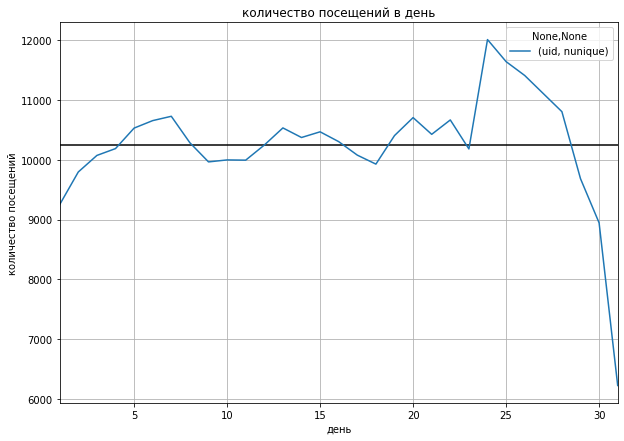

In [11]:
#построим график количества посещений за месяц по дням 
visits_day_un.plot (grid=True, title='количество посещений в день', figsize=(10,7))
plt.gca().set(xlabel='день', ylabel = 'количество посещений')
plt.hlines(10241, 0, 35)

Мы  выдим, что к концу месяца с 25 числа количество посещений падает, снижается спрос.

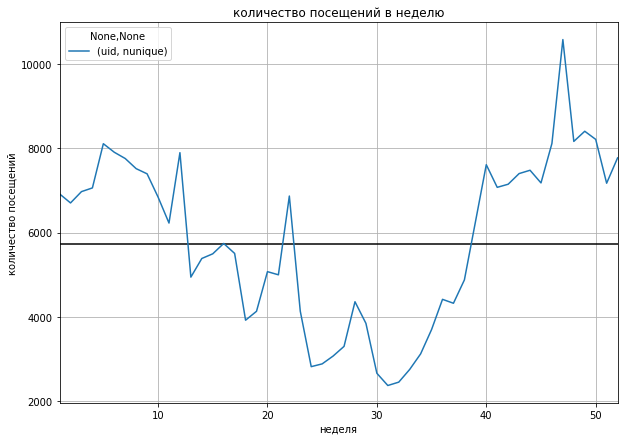

In [12]:
#построим график количества посещений по неделям
visits_week_un.plot(grid=True, title='количество посещений в неделю', figsize=(10,7))
plt.gca().set(xlabel='неделя', ylabel = 'количество посещений')
plt.hlines(5716, 0, 55)

Видим, что у нас присуствует сезонность. Летом спад и пик в ноябре-декабре 

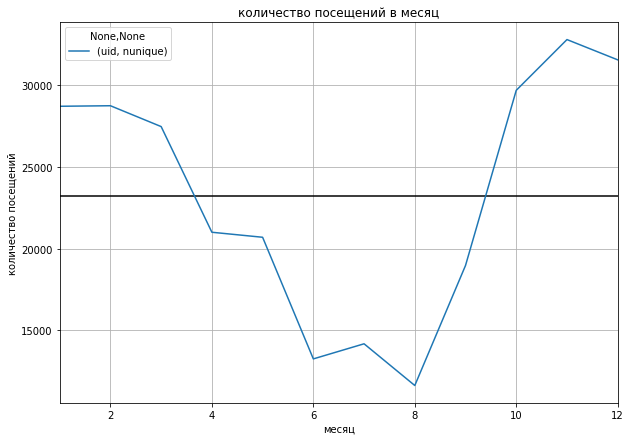

In [13]:
#построим график количества посещений по месяцам
visits_month_un.plot (grid=True, title='количество посещений в месяц', figsize=(10,7))
plt.gca().set(xlabel='месяц', ylabel = 'количество посещений')
plt.hlines(23228, 0, 15)

Графиком по месяцам подтвердили, что с июня по июль спад активности пользователей. И начиная с сентября люди проявляют свою активность,пик видим в ноябре.

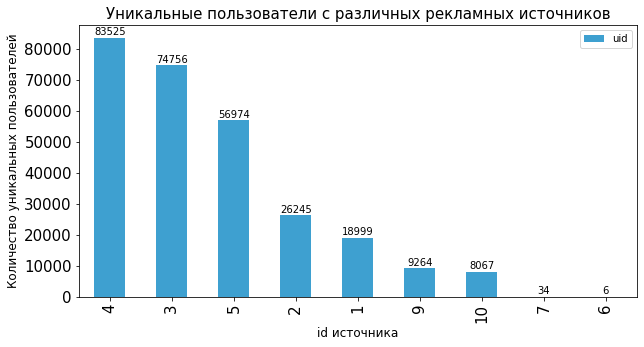

In [14]:
ax = (df_v
        .pivot_table(index=['source_id'], aggfunc={'uid':'nunique'})
        .sort_values(by='uid',ascending=False)
        .plot(kind='bar', figsize=(10,5),fontsize=15,color='#3EA0D0')
     )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 900,
           '{:1.0f}'.format(height),
           ha="center")
plt.title('Уникальные пользователи с различных рекламных источников',fontsize=15)
plt.xlabel('id источника', fontsize=12)
plt.ylabel('Количество уникальных пользователей', fontsize=12)
plt.show()

In [15]:
df_v_cohorts = df_v.groupby(['start_ts', 'end_ts']).agg({'uid':['nunique']})
df_v_cohorts = df_v_cohorts.reset_index()
df_v_cohorts['lifetime'] = df_v['end_ts'] - df_v['start_ts']
df_v_cohorts['lifetime'] = df_v_cohorts['lifetime'] / np.timedelta64(1, 'M')
df_v_cohorts['lifetime'] = df_v_cohorts['lifetime'].round().astype('int')
print(df_v_cohorts[['start_ts', 'end_ts','lifetime']].head())
#df_v_cohorts.head(10)

             start_ts              end_ts lifetime
                                                  
0 2017-06-01 00:01:00 2017-06-01 00:02:00        0
1 2017-06-01 00:02:00 2017-06-01 00:02:00        0
2 2017-06-01 00:02:00 2017-06-01 00:16:00        0
3 2017-06-01 00:04:00 2017-06-01 00:04:00        0
4 2017-06-01 00:09:00 2017-06-01 00:11:00        0


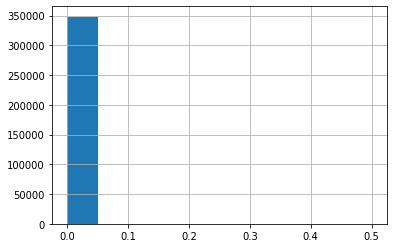

In [16]:
df_v_cohorts['lifetime'].hist(range =(0,0.5))

In [17]:
#посчитаем количество сессий  на одного пользователя в месяц
session_per_user =df_v.groupby(['year','month']).agg({'uid':['count','nunique']})
session_per_user.columns =['n_sessions', 'n_users']
session_per_user['session_per_user'] = session_per_user['n_sessions'] / session_per_user['n_users']
session_per_user.head(10)

n_sessions  n_users  session_per_user
year month                                       
2017 6           16505    13259          1.244815
     7           17828    14183          1.256998
     8           14355    11631          1.234202
     9           23907    18975          1.259921
     10          37903    29692          1.276539
     11          43969    32797          1.340641
     12          41983    31557          1.330386
2018 1           36939    28716          1.286356
     2           37182    28749          1.293332
     3           35679    27473          1.298693

среденяя продолжительность сессии: 643.506488592098
медиана продолжительности сессии: 300.0


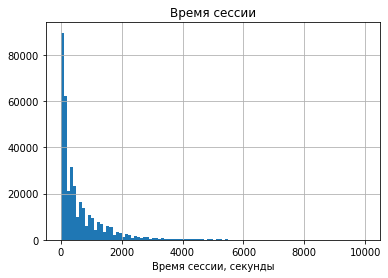

In [18]:
#Найдем продолжительность сессии и построим гистограмму
df_v['session_duration_sec'] = (df_v['end_ts'] - df_v['start_ts']).dt.seconds
df_v_mean = df_v['session_duration_sec'].mean()
df_v_median = df_v['session_duration_sec'].median()

df_v['session_duration_sec'].hist(bins=100,range =(0, 10000))
plt.title('Время сессии')
plt.xlabel('Время сессии, секунды')

print('среденяя продолжительность сессии:', df_v_mean)
print('медиана продолжительности сессии:', df_v_median)

Мы узнали, что в среднем пользователь проводит на сайте около 643 сек, это приблизительно 10 минут. Видим также по таблице, что больше всего сессий в ноябре-декабре, это поддтверждает ранее сделанные выводы о сезонности. Но у нас есть большие выбросы, применим медиану, увидели что по медиане пользователи проводят на сайте 300 сек, это 5 мин.

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df_v['start_ts'] = pd.to_datetime(df_v['start_ts'])
first_activity_date = df_v.groupby(['uid'])['start_ts'].min().reset_index()
first_activity_date.columns =['uid','first_activity_date']
first_activity_date['first_activity_date'] = pd.to_datetime(first_activity_date['first_activity_date']).astype('datetime64[W]')
df_v = df_v.merge(first_activity_date, on='uid')
                             
df_v['activity_week'] = pd.to_datetime(df_v['start_ts'], unit='d').astype('datetime64[W]')

df_v['activity_week'] = pd.to_datetime(df_v['start_ts'], unit='d') - pd.to_timedelta(df_v['start_ts'].dt.dayofweek, unit='d')
df_v['first_activity_week'] = pd.to_datetime(df_v['first_activity_date'], unit='d') - pd.to_timedelta(df_v['first_activity_date'].dt.dayofweek, unit='d')


df_v['cohort_lifetime'] = df_v['activity_week'] - df_v['first_activity_week']
df_v['cohort_lifetime'] = df_v['cohort_lifetime'] / np.timedelta64(1, 'W')
df_v['cohort_lifetime'] = df_v['cohort_lifetime'].astype('int')

df_v.head(10)

cohorts = df_v.groupby(['first_activity_week','cohort_lifetime']).agg({'uid':['nunique']}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_activity_week','uid']]
initial_users_count = initial_users_count.rename(columns = {'uid': 'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on= 'first_activity_week')

#рассчитаем Retention Rate, как часто возвращаются люди 
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts.head(10)

,first_activity_week,cohort_lifetime,uid,cohort_users,retention
,,,nunique,nunique,
0,2017-05-29,0,2021,2021,1.000000
1,2017-05-29,1,2246,2021,1.111331
2,2017-05-29,2,170,2021,0.084117
3,2017-05-29,3,132,2021,0.065314
4,2017-05-29,4,141,2021,0.069767
5,2017-05-29,5,132,2021,0.065314
6,2017-05-29,6,127,2021,0.062840
7,2017-05-29,7,123,2021,0.060861
8,2017-05-29,8,97,2021,0.047996


In [21]:
#создадим тепловую карту

#retention_pivot = cohorts.pivot_table(
           #index = 'first_activity_week',
           #columns = 'cohort_lifetime',
           #values = 'retention',
           #aggfunc = 'sum')


#sns.set(style='white')
#plt.figure(figsize=(20,20))
#plt.title('Когорты, удержание пользователей')
#sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1,linecolor='gray')


In [22]:
df_v['activity_month'] = pd.to_datetime(df_v['start_ts'], unit='d').astype('datetime64[M]')

df_v['activity_month'] = pd.to_datetime(df_v['start_ts'], unit='d') - pd.to_timedelta(df_v['start_ts'].dt.daysinmonth, unit='d')
df_v['first_activity_month'] = pd.to_datetime(df_v['first_activity_date'], unit='d') - pd.to_timedelta(df_v['first_activity_date'].dt.daysinmonth, unit='d')


df_v['cohort_lifetime'] = df_v['activity_month'] - df_v['first_activity_month']
df_v['cohort_lifetime'] = df_v['cohort_lifetime'] / np.timedelta64(1, 'M')
df_v['cohort_lifetime'] = df_v['cohort_lifetime'].astype('int')

df_v.head(10)

cohorts = df_v.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':['nunique']}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns = {'uid': 'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on= 'first_activity_month')

#рассчитаем Retention Rate, как часто возвращаются люди 
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts.head(10)

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
,,,nunique,nunique,
0,2017-05-02,0,4082,4082,1.000000
1,2017-05-02,1,336,4082,0.082313
2,2017-05-02,2,254,4082,0.062224
3,2017-05-02,3,324,4082,0.079373
4,2017-05-02,4,370,4082,0.090642
5,2017-05-02,5,365,4082,0.089417
6,2017-05-02,6,320,4082,0.078393
7,2017-05-02,7,289,4082,0.070799
8,2017-05-02,8,277,4082,0.067859


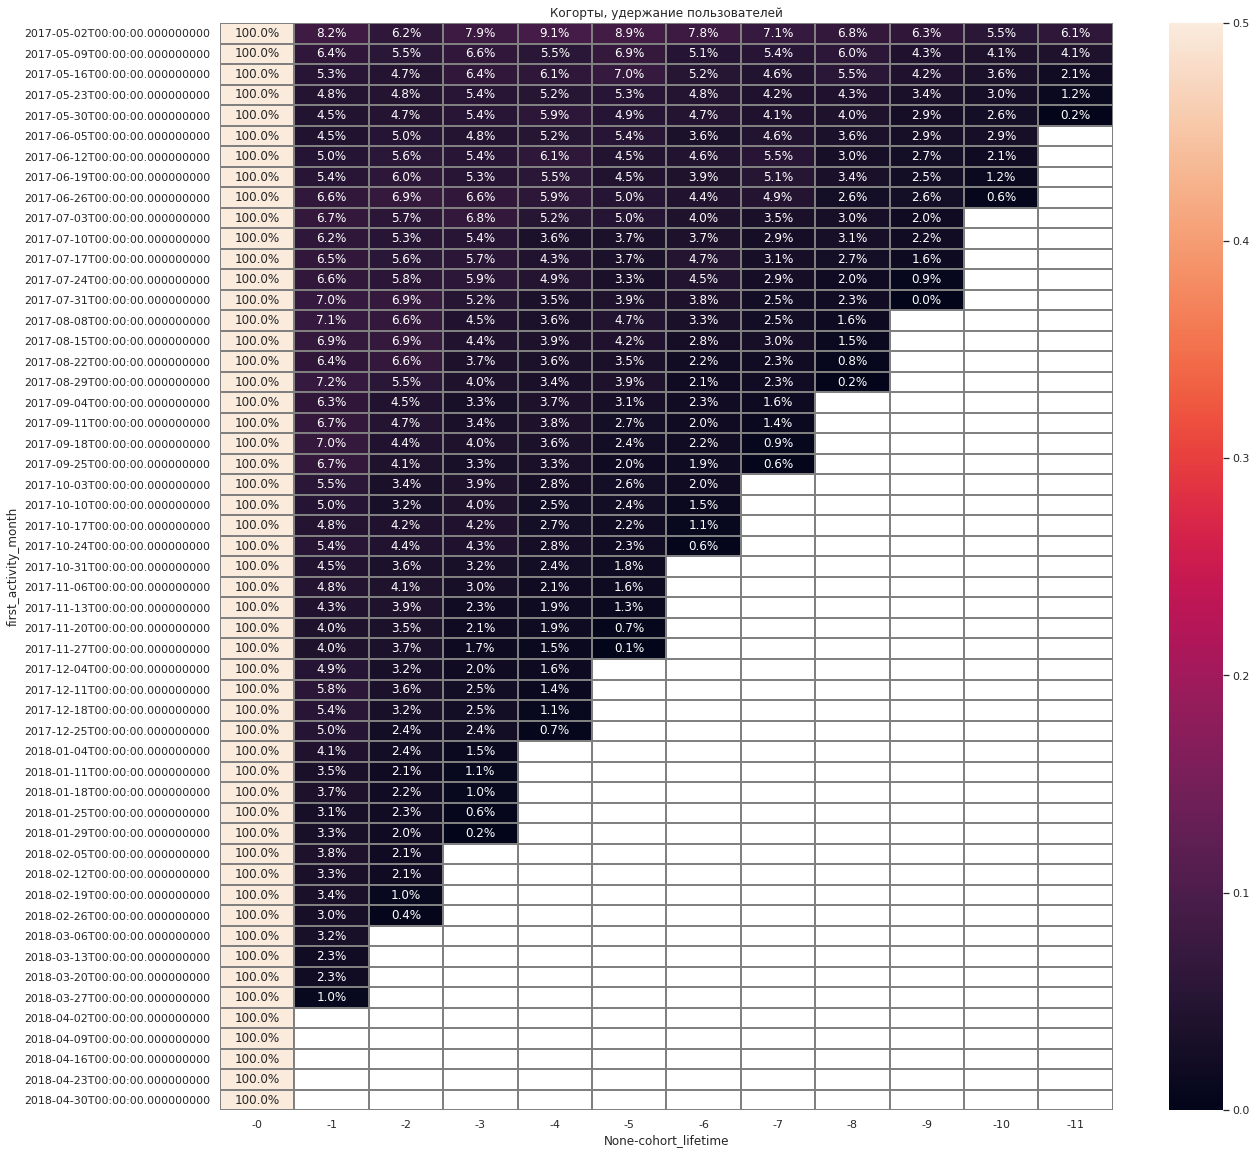

In [23]:
#создадим тепловую карту

retention_pivot = cohorts.pivot_table(
           index = 'first_activity_month',
           columns = 'cohort_lifetime',
           values = 'retention',
           aggfunc = 'sum')


sns.set(style='white')
plt.figure(figsize=(20,20))
plt.title('Когорты, удержание пользователей')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1,linecolor='gray', vmin=0, vmax=0.5)

мы видим, что возвращаются пользователи неохотно. процент возвратов менее 10%. 

In [24]:
df_v['start_ts'] = pd.to_datetime(df_v['start_ts'])
first_activity_date = df_v.groupby(['uid'])['start_ts'].min()
first_activity_date.name ='first_activity_date'
first_activity_date.head(10)

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
397399764396656   2018-01-18 12:32:00
407573351275847   2017-06-17 13:40:00
498809019029702   2018-02-21 22:09:00
526778907996220   2017-10-21 17:51:00
577434573913691   2018-01-28 14:15:00
Name: first_activity_date, dtype: datetime64[ns]

<a id='Продажи'></a>
### 3.2 Продажи

In [25]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [26]:
df_v_day = df_v.groupby(['uid'], as_index = False).agg({'start_ts':'min'})
orders_day = orders.groupby(['uid'], as_index = False).agg({'buy_ts':'min'})

In [27]:
orders_first_buy = orders_day.merge(df_v_day, on= 'uid')
orders_first_buy.head()

,uid,buy_ts,start_ts
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [28]:
orders_first_buy['start_ts'] = pd.to_datetime(orders_first_buy['start_ts']).dt.date
orders_first_buy['buy_ts'] = pd.to_datetime(orders_first_buy['buy_ts']).dt.date

In [29]:
orders_first_buy['where_buy'] = (orders_first_buy['start_ts'] - orders_first_buy['buy_ts']).abs()
orders_first_buy = orders_first_buy.drop(['buy_ts', 'start_ts'], axis=1)
orders_first_buy.head(5)

,uid,where_buy
0,313578113262317,107 days
1,1575281904278712,0 days
2,2429014661409475,0 days
3,2464366381792757,1 days
4,2551852515556206,0 days


In [30]:
unique_numbers_mean = orders_first_buy['where_buy'].mean()
unique_numbers_medium = orders_first_buy['where_buy'].median()
print(unique_numbers_mean)

16 days 21:30:05.864797


In [31]:
#unique_numbers_medium = orders_first_buy['where_buy'].median()
#print(unique_numbers_medium )

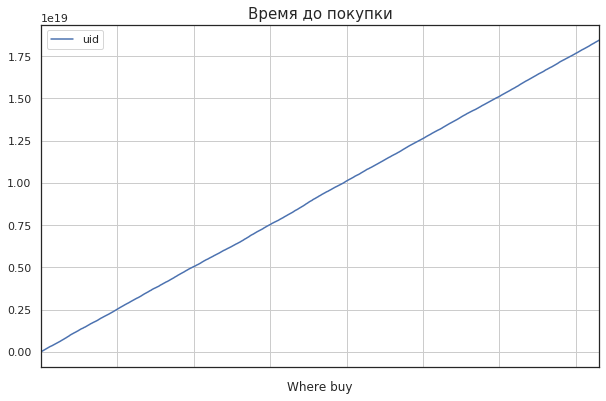

In [32]:
orders_first_buy.plot(x ='where_buy', grid=True, figsize=(10,7))
plt.title('Время до покупки',fontsize=15)
plt.xlabel('Where buy', fontsize=12)
plt.show()

In [33]:
orders.head(10)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [34]:
orders['order_date'] =pd.to_datetime(orders['buy_ts'])
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

In [35]:
#получим месяц первой покупки каждого покупателя
first_order = orders.groupby('uid').agg({'order_month':'min'}).reset_index()
first_order.columns = ['uid', 'first_order_month']
first_order.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [36]:
orders = orders.merge(first_order, on= 'uid')
orders.head()

,buy_ts,revenue,uid,order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [37]:
revenue_sum = orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
revenue_sum.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [38]:
#посчитаем количество новых покупателей за каждый месяц
cohort_sizes = first_order.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n-buyers']
cohort_sizes.head()

,first_order_month,n-buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [39]:
orders_new = pd.merge(orders, revenue_sum, on='first_order_month')
orders_new = orders_new.drop(['revenue_x','order_month_x'],axis=1)
orders_new.head()

,buy_ts,uid,order_date,first_order_month,order_month_y,revenue_y
0,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,9557.49
1,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-07-01,981.82
2,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-08-01,885.34
3,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-09-01,1931.30
4,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-10-01,2068.58


In [40]:
orders_new = pd.merge(orders_new, cohort_sizes, on= 'first_order_month')
#orders_new = orders_new.drop(['n-buyers_x', ],axis=1)
orders_new.head()

,buy_ts,uid,order_date,first_order_month,order_month_y,revenue_y,n-buyers
0,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-10-01,2068.58,2023


In [41]:
margin_rate = 1

In [42]:
#orders_first_month = pd.merge(orders, first_order, on= 'uid')
#cohorts = orders_first_month.groupby(['first_order_month','order_month_y']).agg({'revenue_y':'sum'}).reset_index()
#report = pd.merge(cohort_sizes,cohorts, on='first_order_month')

In [43]:
orders_new['gr'] = orders_new['revenue_y'] * margin_rate
orders_new['age'] = (orders_new['order_month_y'] - orders_new['first_order_month']) / np.timedelta64(1,'M')
orders_new['age'] = orders_new['age'].round().astype('int')

In [44]:
#найдем LTV
orders_new['ltv'] = orders_new['gr'] / orders_new['n-buyers']
result =orders_new.pivot_table(
     index = 'first_order_month',
     columns = 'age',
     values = 'ltv',
     aggfunc = 'mean').cumsum(axis=1)
#result = result.cumsum(axis=1)
result.fillna('')

#посчитаем итоговый ltv для первой когорты 
ltv_20170601 = result.loc['2017-06-01'].sum()
print(ltv_20170601)

102.36895205141204


In [45]:
orders_new.head()

,buy_ts,uid,order_date,first_order_month,order_month_y,revenue_y,n-buyers,gr,age,ltv
0,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,9557.49,2023,9557.49,0,4.724414
1,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-07-01,981.82,2023,981.82,1,0.485329
2,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-08-01,885.34,2023,885.34,2,0.437637
3,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-09-01,1931.30,2023,1931.30,3,0.954671
4,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-10-01,2068.58,2023,2068.58,4,1.022531


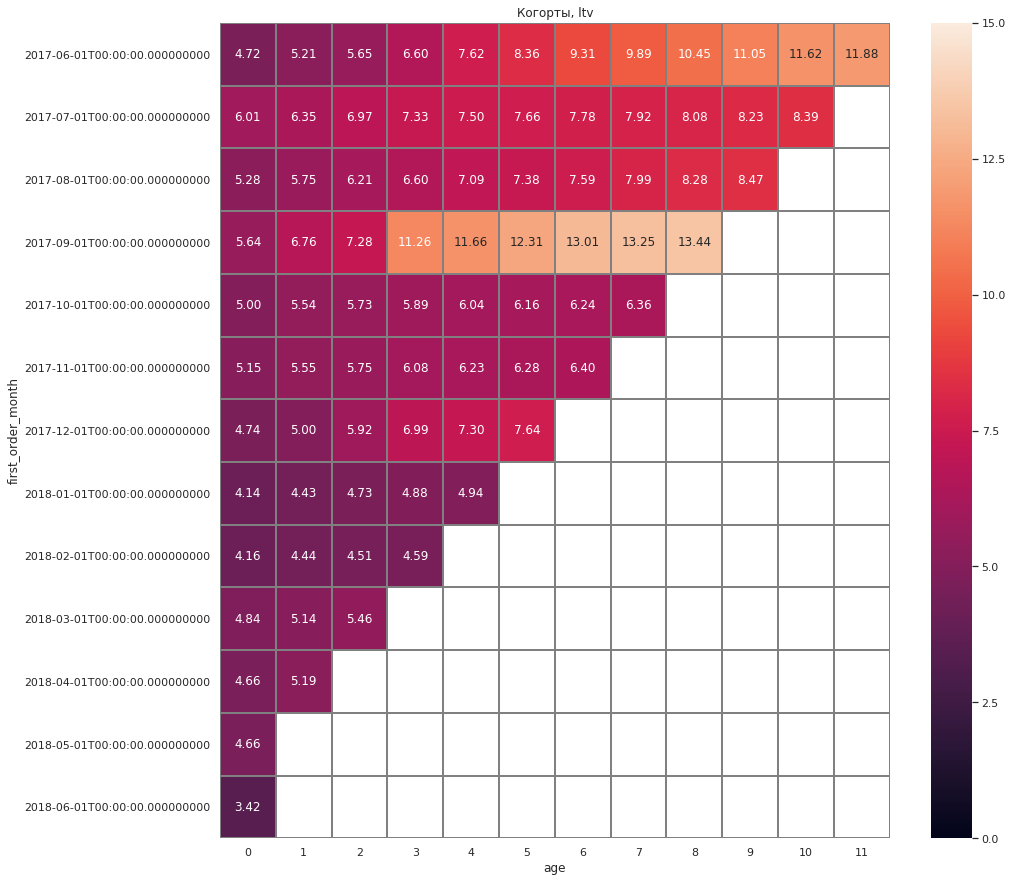

In [46]:
#создадим тепловую карту

#orders_new_pivot = orders_new.pivot_table(
           #index = 'first_order_month',
           #columns = 'age',
           #values = 'ltv',
           #aggfunc = 'mean')


sns.set(style='white')
plt.figure(figsize=(15,15))
plt.title('Когорты, ltv')
sns.heatmap(result, annot=True,fmt='.2f', linewidths=1, linecolor='gray', vmin=0, vmax=15)

Построив тепловую карту, видим, что ltv увеличивается с каждым месяцем 

Средний чек отображает сезонность, которую мы ранее выявили. В самый пик (ноябрь-декабрь)

In [47]:
orders_new_mean = orders_new['revenue_y'].mean()
print(orders_new_mean)

3474.926950197094


In [48]:
orders_mean = orders['revenue'].mean()
print(orders_mean)

4.999646930477041


<a id='Маркетинг'></a>
### 3.3 Маркетинг

In [49]:
costs['dt'].describe
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Первая оплата была совершена 1 июня 2017 года.

In [53]:
costs['date'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['date'].astype('datetime64[M]')

#посчитаем CAC
#отфтльтруем нужную когорту
#cohort_20170601 = report[report['first_order_month']=='2017-06-01']

#посчитаем расходы за этот месяц
#costs_20170601 = costs[costs['month']=='2017-06-01']['costs'].sum

#n_buyers_20170601 = cohort_20170601['n-buyers'][0]
#cac_20170601 = costs_20170601 / n_buyers_20170601
#print(cac_20170601)


In [54]:
to_merge = df_v.sort_values( by= 'start_ts').groupby('uid', as_index = False).agg({'source_id' : 'first'})
to_merge.head()

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [55]:
#посчитаем сколько месяцев нужно для окупаемости

# найдем суммарные расходы за каждой месяц
monthly_costs = costs.groupby('month').sum()
monthly_costs.head(10)

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88
2017-11-01,1020,37907.88
2017-12-01,1054,38315.35
2018-01-01,1054,33518.52
2018-02-01,952,32723.03


In [56]:
source_costs = costs.groupby('source_id').sum()
source_costs.head(10)

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [57]:
#добавим данные о расходах и посчитаем CAC
report_new = pd.merge(orders_new, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n-buyers']
report_new.head()

,buy_ts,uid,order_date,first_order_month,order_month_y,revenue_y,n-buyers,gr,age,ltv,source_id,costs,cac
0,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,9557.49,2023,9557.49,0,4.724414,1020,18015.0,8.905091
1,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-07-01,981.82,2023,981.82,1,0.485329,1020,18015.0,8.905091
2,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-08-01,885.34,2023,885.34,2,0.437637,1020,18015.0,8.905091
3,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-09-01,1931.30,2023,1931.30,3,0.954671,1020,18015.0,8.905091
4,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-10-01,2068.58,2023,2068.58,4,1.022531,1020,18015.0,8.905091


In [58]:
report_new_source = report_new.groupby('source_id')


In [59]:
# рассчитаем ROMI
report_new['romi'] = report_new['ltv'] / report_new['cac']
report_new.head()

,buy_ts,uid,order_date,first_order_month,order_month_y,revenue_y,n-buyers,gr,age,ltv,source_id,costs,cac,romi
0,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,9557.49,2023,9557.49,0,4.724414,1020,18015.0,8.905091,0.530530
1,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-07-01,981.82,2023,981.82,1,0.485329,1020,18015.0,8.905091,0.054500
2,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-08-01,885.34,2023,885.34,2,0.437637,1020,18015.0,8.905091,0.049145
3,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-09-01,1931.30,2023,1931.30,3,0.954671,1020,18015.0,8.905091,0.107205
4,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-10-01,2068.58,2023,2068.58,4,1.022531,1020,18015.0,8.905091,0.114825


In [60]:
output =report_new.pivot_table(
     index = 'first_order_month',
     columns = 'age',
     values = 'romi',
     aggfunc = 'mean')
output.cumsum(axis=1)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.530530,0.585030,0.634174,0.741379,0.856205,0.938798,1.045528,1.110838,1.172961,1.240989,1.305138,1.333982
2017-07-01,0.633623,0.668962,0.734697,0.772542,0.791180,0.807631,0.820304,0.835255,0.852253,0.867766,0.884178,NaN
2017-08-01,0.488747,0.532466,0.574934,0.611176,0.656939,0.683202,0.702715,0.740230,0.767297,0.784708,NaN,NaN
2017-09-01,0.597833,0.716200,0.771374,1.192464,1.234889,1.303422,1.377732,1.403485,1.422974,NaN,NaN,NaN
2017-10-01,0.597866,0.661881,0.684749,0.703525,0.721634,0.736016,0.746150,0.759947,NaN,NaN,NaN,NaN
2017-11-01,0.554931,0.597911,0.619394,0.654377,0.670312,0.676112,0.688485,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.542015,0.571800,0.677624,0.799484,0.835281,0.873951,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.416173,0.445835,0.476455,0.490823,0.497132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.463807,0.494855,0.503615,0.511887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
first_activity_source = df_v.sort_values(by='start_ts').groupby(['uid'])['source_id'].first()
first_activity_source.name = 'first_activity_source'
first_activity_source.head()

report_new = report_new.merge(first_activity_source, on ='uid', how ='left')
report_new.head()

,buy_ts,uid,order_date,first_order_month,order_month_y,revenue_y,n-buyers,gr,age,ltv,source_id,costs,cac,romi,first_activity_source
0,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,9557.49,2023,9557.49,0,4.724414,1020,18015.0,8.905091,0.530530,1
1,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-07-01,981.82,2023,981.82,1,0.485329,1020,18015.0,8.905091,0.054500,1
2,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-08-01,885.34,2023,885.34,2,0.437637,1020,18015.0,8.905091,0.049145,1
3,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-09-01,1931.30,2023,1931.30,3,0.954671,1020,18015.0,8.905091,0.107205,1
4,2017-06-01 00:10:00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-10-01,2068.58,2023,2068.58,4,1.022531,1020,18015.0,8.905091,0.114825,1


In [62]:
#Узнаем сколько денег могут тратить маркетологи на привлечение одного покупателя, чтобы окупиться
final_result = report_new.pivot_table(
     index = 'first_order_month',
     columns = 'age',
     values = 'ltv',
     aggfunc = 'mean')
m6_cum_ltv = final_result.cumsum(axis=1).mean(axis=0)[5]
print('Средний LTV за 6 месяцев после первой покупки', m6_cum_ltv)

Средний LTV за 6 месяцев после первой покупки 7.969052630207275


Мы видим, что у нас окупились толкьо 2 гогорты. 2017-09-01 начала окупаться на 3 месяц, а 2017-06-01 на 6 месяц жизни когорты 

In [63]:
first_activity_source_report_new = pd.merge(report_new,first_activity_source, on='uid')


In [64]:
#df_v.columns = ['device','end_ts','source_id','start_ts','uid','day','week','month','year','session_duration_sec', 'first_activity_date','activity_week','first_activity_week','cohort_lifetime','activity_month', 'first_activity_month']
#df_v.head(10)
#df_v_new = df_v.merge(report_new, on='uid')
#df_v_new.head(10)

In [66]:
roi_source = report_new.pivot_table(index= 'first_order_month', 
        columns='first_activity_source', 
        values='romi', 
        aggfunc='mean').cumsum(axis=1)

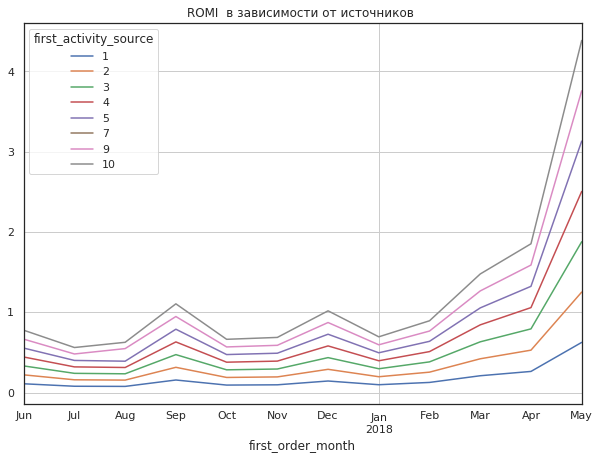

In [67]:
roi_source.plot(grid=True, title='ROMI  в зависимости от источников ', figsize=(10,7))

<a id='Выводы'></a>
## 4.Выводы

Мы проанализировали полученные данные от Яндекс Афиши. Рассмотрели по отдельности данные продукта, продажи и маркетинг. Увидели, что полученные данные  у нас чистые, без всплеском аномалий. Для начала  посмотрели сколько сессий  в день. Узнали, что одна сессия в среднем длится 3 минуты. Время от захода в первый раз до покупки в среднем составляет 16 часов. Мы также видим, что у нас явная сезонность в продажах. Лучше вс
